In [1]:
import copy
from keypress_recognition.models import keyboard_model
from keypress_recognition import dataset
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
dataset.load_all_data(train=100, test=20, val=10)

# of X_train: 100
# of X_test: 20
# of X_val: 10


In [3]:
black_indices = np.array([1, 4, 6, 9, 11, 13, 16, 18, 21, 23, 25, 28, 30, 33, 35, 37, 40, 42, 45, 47, 49, 52, 54, 57, 59, 61, 64, 66, 69, 71, 73, 76, 78, 81, 83, 85])
def visualize_keys(notes):
    """
    notes: size (88,)
    """
    key_color = np.zeros(88, dtype=bool)
    key_color[black_indices] = True
    print(key_color.shape, notes.shape)
    for i in key_color:
        print("🌚" if i else "🏐", end="")
    print()
    for i in notes:
        print("🔶" if i else "🔷", end="")
    print()
visualize_keys(np.array([0,1,0,1] + [0]*84))

(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔶🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷


In [4]:
# print several keyboard images with labels

p, n = dataset.get_sample('train', img=False, method=2)
print(p)

keypress_recognition/dataset/X_train\V09383.jpg


(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷


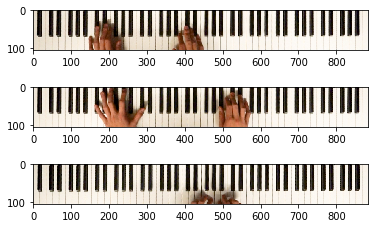

In [5]:
# print several keyboard images with labels
f, a = plt.subplots(3, 1)
for i in range(3):
    
    img, notes = dataset.get_sample('train', method=2)
    a[i].imshow(img)
    visualize_keys(notes)

plt.show()

In [6]:
keyboard_model.train(dataset, batch_size=32, num_epochs=10,
                     learning_rate=1e-3,
                     best_path='keypress_recognition/best_keyboard_model.tar',
                     current_path='keypress_recognition/current_keyboard.tar')

Epoch 1/10


IntProgress(value=0)

train Loss: 0.8937
Precision: 0.01
Recall   : 0.74
Precision: 0.03
Recall   : 0.97


IntProgress(value=0, max=10)

val Loss: 6.1069
Precision: 0.04
Recall   : 0.86
Precision: 0.01
Recall   : 1.00
The best model has been saved to keypress_recognition/best_keyboard_model.tar ...
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 2/10


IntProgress(value=0)

train Loss: 0.7436
Precision: 0.01
Recall   : 0.83
Precision: 0.02
Recall   : 0.83


IntProgress(value=0, max=10)

val Loss: 8.5015
Precision: 0.04
Recall   : 0.82
Precision: 0.01
Recall   : 1.00
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 3/10


IntProgress(value=0)

train Loss: 0.7733
Precision: 0.02
Recall   : 0.78
Precision: 0.02
Recall   : 0.60


IntProgress(value=0, max=10)

val Loss: 8.7681
Precision: 0.04
Recall   : 0.68
Precision: 0.01
Recall   : 1.00
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 4/10


IntProgress(value=0)

train Loss: 0.7771
Precision: 0.02
Recall   : 0.78
Precision: 0.03
Recall   : 0.53


IntProgress(value=0, max=10)

val Loss: 10.1418
Precision: 0.05
Recall   : 0.77
Precision: 0.01
Recall   : 0.33
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 5/10


IntProgress(value=0)

train Loss: 0.7335
Precision: 0.02
Recall   : 0.83
Precision: 0.03
Recall   : 0.43


IntProgress(value=0, max=10)

val Loss: 12.5277
Precision: 0.05
Recall   : 0.77
Precision: 0.01
Recall   : 0.33
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 6/10


IntProgress(value=0)

train Loss: 0.6800
Precision: 0.02
Recall   : 0.78
Precision: 0.04
Recall   : 0.57


IntProgress(value=0, max=10)

val Loss: 12.2009
Precision: 0.05
Recall   : 0.68
Precision: 0.01
Recall   : 0.33
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 7/10


IntProgress(value=0)

train Loss: 0.6388
Precision: 0.03
Recall   : 0.48
Precision: 0.09
Recall   : 0.23


IntProgress(value=0, max=10)

val Loss: 3.7430
Precision: 0.06
Recall   : 0.36
Precision: 0.00
Recall   : 0.00
The best model has been saved to keypress_recognition/best_keyboard_model.tar ...
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 8/10


IntProgress(value=0)

train Loss: 0.6103
Precision: 0.02
Recall   : 0.22
Precision: 0.11
Recall   : 0.37


IntProgress(value=0, max=10)

val Loss: 3.6091
Precision: 0.06
Recall   : 0.27
Precision: 0.00
Recall   : 0.00
The best model has been saved to keypress_recognition/best_keyboard_model.tar ...
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 9/10


IntProgress(value=0)

train Loss: 0.5600
Precision: 0.05
Recall   : 0.30
Precision: 0.21
Recall   : 0.53


IntProgress(value=0, max=10)

val Loss: 2.8524
Precision: 0.14
Recall   : 0.27
Precision: 0.00
Recall   : 0.00
The best model has been saved to keypress_recognition/best_keyboard_model.tar ...
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Epoch 10/10


IntProgress(value=0)

train Loss: 0.5415
Precision: 0.07
Recall   : 0.35
Precision: 0.33
Recall   : 0.60


IntProgress(value=0, max=10)

val Loss: 2.3821
Precision: 0.14
Recall   : 0.27
Precision: 0.00
Recall   : 0.00
The best model has been saved to keypress_recognition/best_keyboard_model.tar ...
Current mode has been saved to keypress_recognition/current_keyboard.tar ...

Training complete in 0m 33s
Best val loss: 2.382115


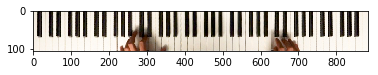

===GROUND TRUTH===
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
+++PREDICTION+++
(88,) torch.Size([88])
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


In [9]:
X, notes = dataset.get_sample('test', method=2)
plt.imshow(X)
plt.show()
print("===GROUND TRUTH===")
visualize_keys(notes)


X = np.transpose(X, [2, 0, 1])[None]
X = torch.Tensor(X)
if torch.cuda.is_available():
    X = X.cuda()
    
    
y = keyboard_model.evaluate(X, threshold=0.5)[0]
print("+++PREDICTION+++")
visualize_keys(y)
print(y)